In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

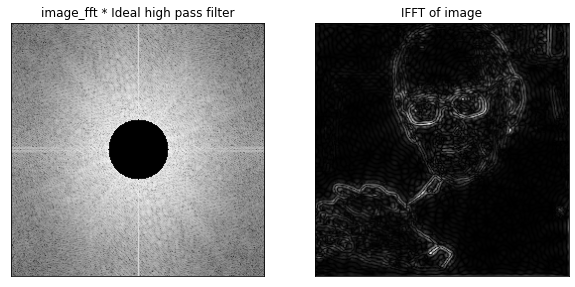

In [4]:
[x, y] = np.meshgrid(np.array(range(-128,128)), np.array(range(-128,128)))
D = np.sqrt(x**2 + y**2)
H = (D > 30)

img = np.array(cv2.imread("professor.jpg", cv2.IMREAD_GRAYSCALE), dtype=np.uint8)
imgF = np.fft.fftshift(np.fft.fft2(img))
M_I = imgF*H
M_I_d = np.abs(M_I)
M_I_d_log = np.log(1+M_I_d)
max_val = np.max(np.max(M_I_d_log))

IFFT = np.fft.ifft2(np.fft.ifftshift(M_I))
IFFTt = np.abs(IFFT)
max_val_2 = np.max(np.max(IFFTt))

fig, axes = plt.subplots(1, 2 ,figsize=(10,5))
axes[0].imshow(M_I_d_log/max_val, cmap='gray', vmin=np.min(M_I_d_log/max_val), vmax=np.max(M_I_d_log/max_val))
axes[0].set_title('image_fft * Ideal high pass filter')

axes[1].imshow(IFFTt/max_val_2, cmap='gray', vmin=np.min(IFFTt/max_val_2), vmax=np.max(IFFTt/max_val_2))
axes[1].set_title('IFFT of image')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()